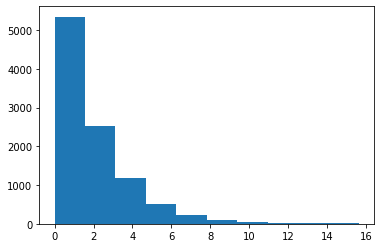

In [8]:
import numpy as np

# Sample size
K = 100
KC = 10000

# Gamma Background
shape, scale = 1., 2.
gamma = np.random.gamma(shape, scale, K)
cgamma = np.random.gamma(shape, scale, KC)
import matplotlib.pyplot as plt
_ = plt.hist( cgamma )

#from scipy.stats import invgamma
#a = 3.0
#rigamma = invgamma.rvs(a, size=K)

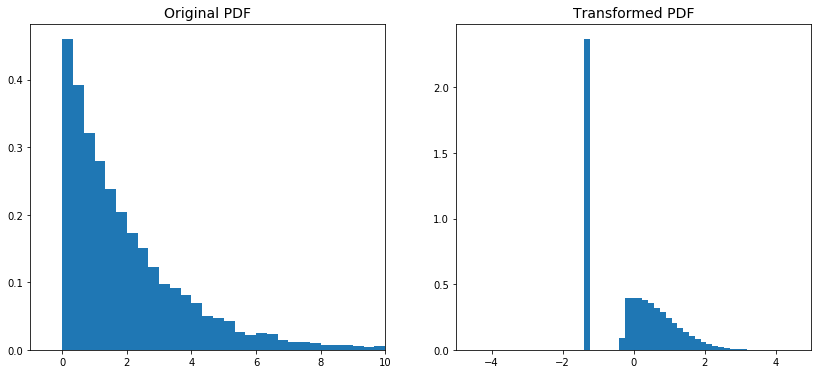

In [48]:
# Empirical CDF of original variable y:  F(y)
data_s = np.sort(cgamma)

p_l = np.arange(len(data_s)) / len(data_s)

from scipy.special import erfinv

def F(y=0.0, data_s=data_s, p_l=p_l, ymin=1.0):
    idxs = [0] * len(y)
    for i in range( len(y) ):
        idxs[i] = int( np.abs(np.asarray(data_s) - y[i]).argmin() )
    return( p_l[idxs] )

    
def F_G_inv(P = 0.0):
    return( np.sqrt(2.0) * erfinv(2.0*P - 1) )


y = cgamma
P = F(y=y, p_l=p_l )

# y < ymin treatment (zero precipitation)
ymin = 1.0
num0c = np.count_nonzero( cgamma < ymin )
PC = p_l[ int(num0c/2) ]
P0 = PC / 2
#print("P0", P0)

P[ y < ymin ] = P0
#
y_t = F_G_inv(P)


#print(y_t.shape)
#print( "Original", gamma[0:10])
#print( "Gaussian CDF", P[0:10] )
#print( "Gaussian y_tilda", y_t[0:10])
#print( np.mean(y_t) )
#print( P, y_t )
#    plt.plot( data_s, p )


xmin2= -5
xmax2= 5
xmin1 = -1
xmax1 = 10
#h_org = 3.5 * np.std(gamma) / np.power( len(y_t), 0.333 )

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots( 1, 2, figsize=(14, 6))

xmin_l = [ xmin1, xmin2 ]
xmax_l = [ xmax1, xmax2 ]

tit_l = [ "Original PDF", "Transformed PDF" ]
sigma_l = [ np.std( y, ddof=1 ), 1.0 ]
ax_l = [ax1, ax2 ]
dat_l = [ y, y_t,  ]
for i, dat in  enumerate( dat_l ):
    h = 3.5 * sigma_l[i] / np.power( len(y_t), 0.333 )
    nbin = int ( ( xmax_l[i] - xmin_l[i] ) / h )

    _ = ax_l[i].hist( dat, density=True, range=(xmin_l[i], xmax_l[i]), 
                     bins=nbin )
    ax_l[i].set_xlim( xmin_l[i], xmax_l[i] )
    ax_l[i].text( 0.5, 1.01, tit_l[i],
                 fontsize=14, transform=ax_l[i].transAxes,
                horizontalalignment='center',
                verticalalignment='bottom',
                )